In [ ]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.io as pio
import sklearn
import warnings
import sksurv.datasets
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.exceptions import UndefinedMetricWarning
from sklearn import set_config
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import make_pipeline
from sksurv.datasets import load_breast_cancer
from sksurv.linear_model import CoxnetSurvivalAnalysis, CoxPHSurvivalAnalysis
from sksurv.preprocessing import OneHotEncoder

warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
set_config(display="text")  # displays text representation of estimators

In [ ]:
# df_meteo=pd.read_csv('https://projet-incendie.s3.eu-west-3.amazonaws.com/Param%C3%A8tres_API.csv', sep=';')
# pd.set_option('display.max_rows', None)
# display(df_meteo)

,Mnémonique,Libellé,Unité,Pas de temps
0,BA300,HAUTEUR MINIMALE DE LA COUCHE >300M AVEC UNE N...,METRES,quotidien
1,BROU,OCCURRENCE DE BROUILLARD QUOTIDIENNE,BOOLEEN,quotidien
2,BRUME,OCCURRENCE DE BRUME QUOTIDIENNE,BOOLEEN,quotidien
3,DG,DUREE DE GEL QUOTIDIENNE,MINUTES,quotidien
4,DHUMEC,DUREE HUMECTATION QUOTIDIENNE,MINUTES,quotidien
5,DHUMI40,DUREE HUMIDITE <= 40% QUOTIDIENNE,MINUTES,quotidien
6,DHUMI80,DUREE HUMIDITE >= 80% QUOTIDIENNE,MINUTES,quotidien
7,DIFT,RAYONNEMENT DIFFUS QUOTIDIEN,JOULES/CM2,quotidien
8,DIRT,RAYONNEMENT DIRECT QUOTIDIEN,JOULES/CM2,quotidien
9,DRR,DUREE DES PRECIPITATIONS QUOTIDIENNES,MINUTES,quotidien


In [3]:
df_corse=pd.read_csv('https://projet-incendie.s3.eu-west-3.amazonaws.com/Dataset_modele.csv', sep=';')

pd.set_option('display.max_columns', None)
df_corse.head()

,POSTE,RR,DRR,TN,HTN,TX,HTX,TM,TMNX,TNSOL,TN50,TAMPLI,TNTXM,FFM,FXI,DXI,HXI,FXY,DXY,HXY,FXI3S,HXI3S,UN,HUN,UX,HUX,DHUMI40,DHUMI80,TSVM,UM,ORAG,BRUME,ETPMON,ETPGRILLE,year,month,day,Département_x,Code Postal,Code INSEE,Commune,geo_point_2d,date,Département_y,Nom de la commune,latitude,longitude,Surface parcourue (m2),Surface forêt (m2),Surface maquis garrigues (m2),Autres surfaces naturelles hors forêt (m2),Surfaces agricoles (m2),Autres surfaces (m2),Surface autres terres boisées (m2),Surfaces non boisées naturelles (m2),Surfaces non boisées artificialisées (m2),Surfaces non boisées (m2),Type de peuplement,Nature,Feux
0,20142001.0,40.0,NaN,3.0,NaN,8.0,NaN,NaN,5.50,NaN,NaN,5.0,5.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006.0,1.0,1.0,20.0,20142.0,2A056,CAMPO,"41.890691356038275, 9.000984854426516",2006-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,20135002.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006.0,1.0,1.0,20.0,20135.0,2A092,CONCA,"41.753081312395295, 9.330311865111108",2006-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,20148001.0,1.2,NaN,6.1,1750.0,13.2,1012.0,9.5,9.65,1.8,3.2,7.1,9.7,2.6,14.9,260.0,2217.0,9.0,270.0,2222.0,NaN,NaN,54.0,2219.0,91.0,1.0,0.0,704.0,9.4,78.0,0.0,0.0,1.1,1.1,2006.0,1.0,1.0,20.0,20148.0,2A099,COZZANO,"41.933536178154235, 9.186589019928942",2006-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,20114002.0,5.4,505.0,10.1,1711.0,12.5,847.0,11.0,11.30,8.8,9.0,2.4,11.3,7.3,19.0,270.0,1613.0,12.0,280.0,2054.0,NaN,NaN,61.0,2028.0,93.0,103.0,0.0,791.0,10.6,80.0,0.0,0.0,1.6,0.5,2006.0,1.0,1.0,20.0,20114.0,2A114,FIGARI,"41.5163043788812, 9.120594158285483",2006-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,20142001.0,40.0,NaN,3.0,NaN,8.0,NaN,NaN,5.50,NaN,NaN,5.0,5.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006.0,1.0,1.0,20.0,20142.0,2A253,QUASQUARA,"41.90875371016429, 9.008361179069034",2006-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [4]:
df_corse['Feux'].value_counts()

Feux
0.0    228658
1.0      9509
Name: count, dtype: int64

In [5]:
df_corse.shape

(238167, 60)

In [29]:
df_corse.isnull().sum()/len(df_corse)*100

POSTE                                           3.638823
RR                                              4.932233
DRR                                            95.417873
TN                                             19.213253
HTN                                            27.634323
TX                                             19.262124
HTX                                            27.621684
TM                                             27.389965
TMNX                                           19.273921
TNSOL                                          94.652780
TN50                                           94.641826
TAMPLI                                         19.273921
TNTXM                                          19.273921
FFM                                            40.279410
FXI                                            40.346398
DXI                                            40.432766
HXI                                            40.467734
FXY                            

In [30]:
df_corse.columns

Index(['POSTE', 'RR', 'DRR', 'TN', 'HTN', 'TX', 'HTX', 'TM', 'TMNX', 'TNSOL',
       'TN50', 'TAMPLI', 'TNTXM', 'FFM', 'FXI', 'DXI', 'HXI', 'FXY', 'DXY',
       'HXY', 'FXI3S', 'HXI3S', 'UN', 'HUN', 'UX', 'HUX', 'DHUMI40', 'DHUMI80',
       'TSVM', 'UM', 'ORAG', 'BRUME', 'ETPMON', 'ETPGRILLE', 'year', 'month',
       'day', 'Département_x', 'Code Postal', 'Code INSEE', 'Commune',
       'geo_point_2d', 'date', 'Département_y', 'Nom de la commune',
       'latitude', 'longitude', 'Surface parcourue (m2)', 'Surface forêt (m2)',
       'Surface maquis garrigues (m2)',
       'Autres surfaces naturelles hors forêt (m2)', 'Surfaces agricoles (m2)',
       'Autres surfaces (m2)', 'Surface autres terres boisées (m2)',
       'Surfaces non boisées naturelles (m2)',
       'Surfaces non boisées artificialisées (m2)',
       'Surfaces non boisées (m2)', 'Type de peuplement', 'Nature', 'année',
       'mois', 'jour', 'heure', 'mois_nom', 'Feux'],
      dtype='object')

In [31]:
df_variables = df_corse[[
    'année', 'mois', 'jour', 'Nature', 'latitude', 'longitude',
    'moyenne precipitations mois', 'moyenne temperature mois',
    'moyenne evapotranspiration mois', 'moyenne vitesse vent année',
    'moyenne vitesse vent mois', 'moyenne temperature année',
    'RR', 'FXY', 'UM', 'ETPMON', 'TSVM', 'TNSOL', 'Feux'
]]
df_variables.head()

KeyError: "['moyenne precipitations mois', 'moyenne temperature mois', 'moyenne evapotranspiration mois', 'moyenne vitesse vent année', 'moyenne vitesse vent mois', 'moyenne temperature année'] not in index"

In [8]:
df_variables.rename(columns={
    'RR': 'Précipitations en mm',
    'FXY': 'Vitesse moyenne du vent en m/s',
    'UM': 'Humidité moyenne en %',
    'ETPMON': 'Evapotranspiration en mm',
    'TSVM': 'Taux de vapeur',
    'TNSOL': 'Température du sol'
    
}, inplace=True)
df_variables.head()

C:\Users\joelt\AppData\Local\Temp\ipykernel_944\3599948250.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_variables.rename(columns={


,année,mois,jour,Nature,latitude,longitude,moyenne precipitations mois,moyenne temperature mois,moyenne evapotranspiration mois,moyenne vitesse vent année,moyenne vitesse vent mois,moyenne temperature année,Précipitations en mm,Vitesse moyenne du vent en m/s,Humidité moyenne en %,Evapotranspiration en mm,Taux de vapeur,Température du sol,Feux
0,2006,1,1,NaN,NaN,NaN,3.075112,7.558919,1.32346,3.525229,3.789412,15.162838,16.0,NaN,NaN,NaN,NaN,NaN,0.0
1,2006,1,2,NaN,NaN,NaN,3.075112,7.558919,1.32346,3.525229,3.789412,15.162838,1.5,NaN,NaN,NaN,NaN,NaN,0.0
2,2006,1,3,NaN,NaN,NaN,3.075112,7.558919,1.32346,3.525229,3.789412,15.162838,0.3,NaN,NaN,NaN,NaN,NaN,0.0
3,2006,1,4,NaN,NaN,NaN,3.075112,7.558919,1.32346,3.525229,3.789412,15.162838,0.2,NaN,NaN,NaN,NaN,NaN,0.0
4,2006,1,5,NaN,NaN,NaN,3.075112,7.558919,1.32346,3.525229,3.789412,15.162838,1.0,NaN,NaN,NaN,NaN,NaN,0.0


In [9]:
print(df_variables.columns)

Index(['année', 'mois', 'jour', 'Nature', 'latitude', 'longitude',
       'moyenne precipitations mois', 'moyenne temperature mois',
       'moyenne evapotranspiration mois', 'moyenne vitesse vent année',
       'moyenne vitesse vent mois', 'moyenne temperature année',
       'Précipitations en mm', 'Vitesse moyenne du vent en m/s',
       'Humidité moyenne en %', 'Evapotranspiration en mm', 'Taux de vapeur',
       'Température du sol', 'Feux'],
      dtype='object')


In [10]:
features = ['mois', 'jour',
       'moyenne precipitations mois','moyenne evapotranspiration mois',
       'moyenne vitesse vent année','moyenne vitesse vent mois','moyenne temperature année',
       'moyenne temperature mois','Précipitations en mm',
       'Vitesse moyenne du vent en m/s', 'Humidité moyenne en %',
       'Evapotranspiration en mm','Taux de vapeur', 'Température du sol',
       'Feux']
       
df_selected = df_variables[features]

corr_matrix = df_selected.corr()

In [11]:
df_selected.isnull().sum()/len(df_selected)*100

mois                                0.000000
jour                                0.000000
moyenne precipitations mois         0.000000
moyenne evapotranspiration mois     0.000000
moyenne vitesse vent année          0.000000
moyenne vitesse vent mois           0.000000
moyenne temperature année           0.000000
moyenne temperature mois            0.000000
Précipitations en mm                9.903422
Vitesse moyenne du vent en m/s     52.299946
Humidité moyenne en %              49.290197
Evapotranspiration en mm           90.240688
Taux de vapeur                     49.354676
Température du sol                 89.785456
Feux                                0.000000
dtype: float64

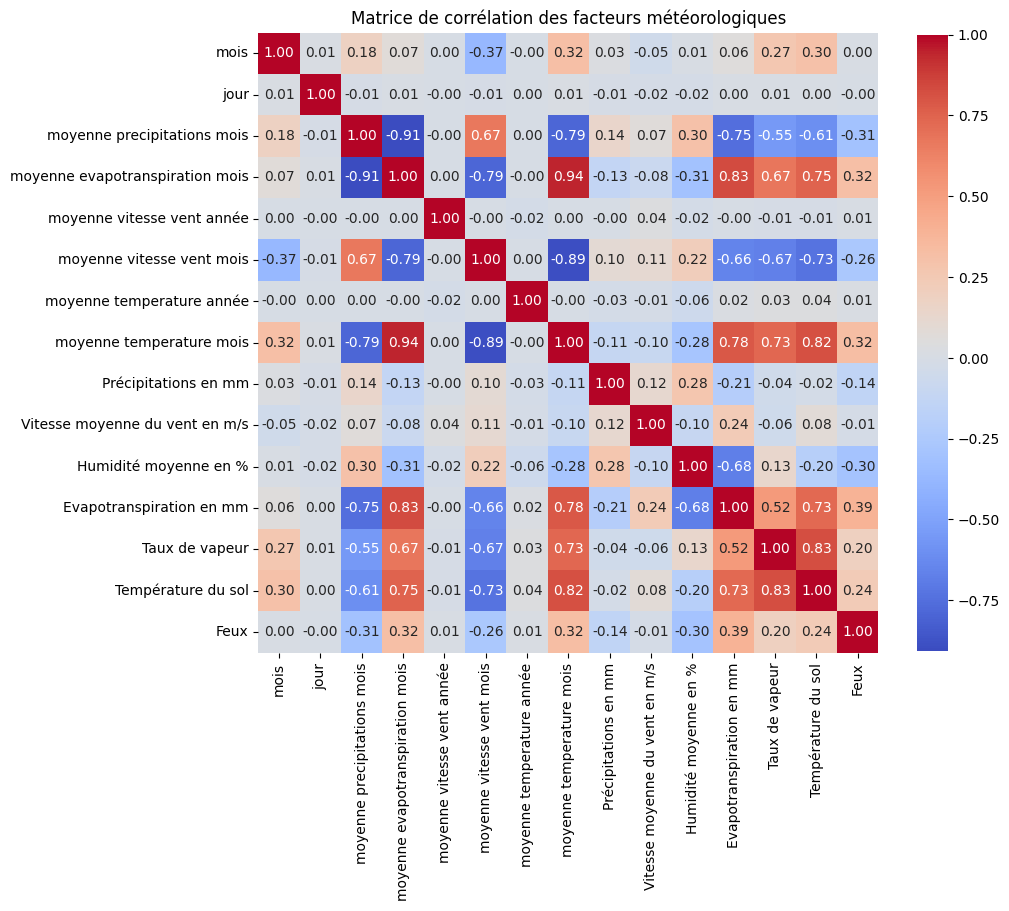

In [12]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

plt.title("Matrice de corrélation des facteurs météorologiques")
plt.show()

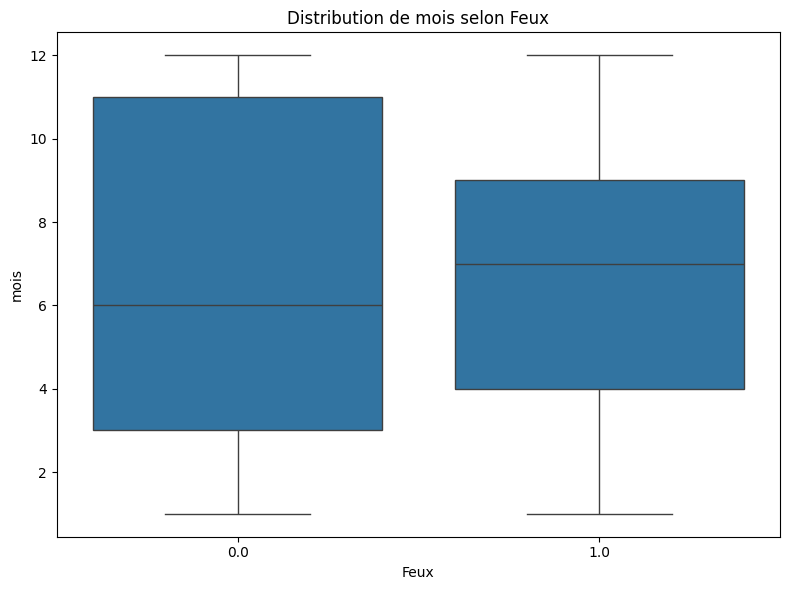

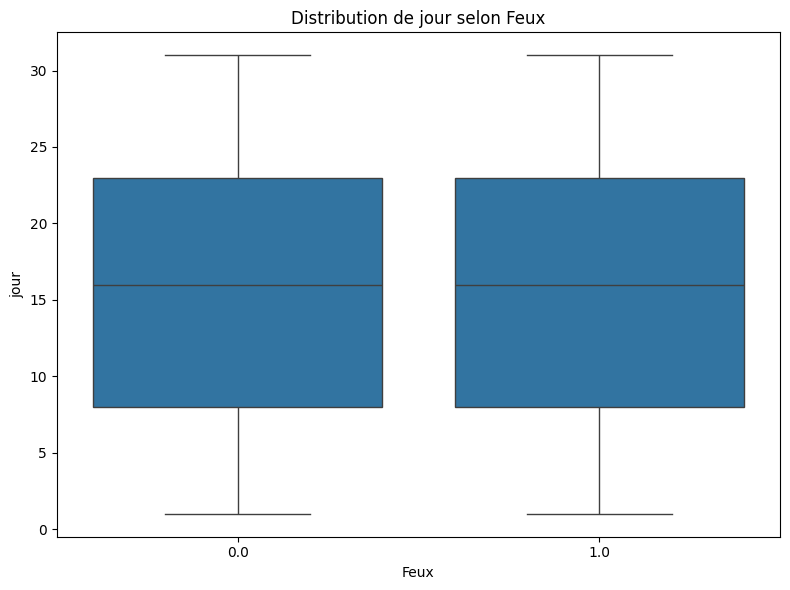

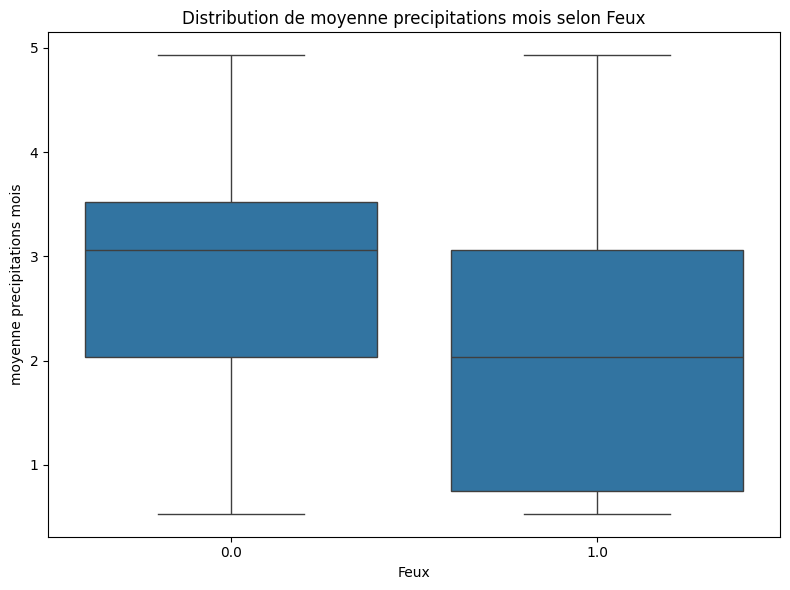

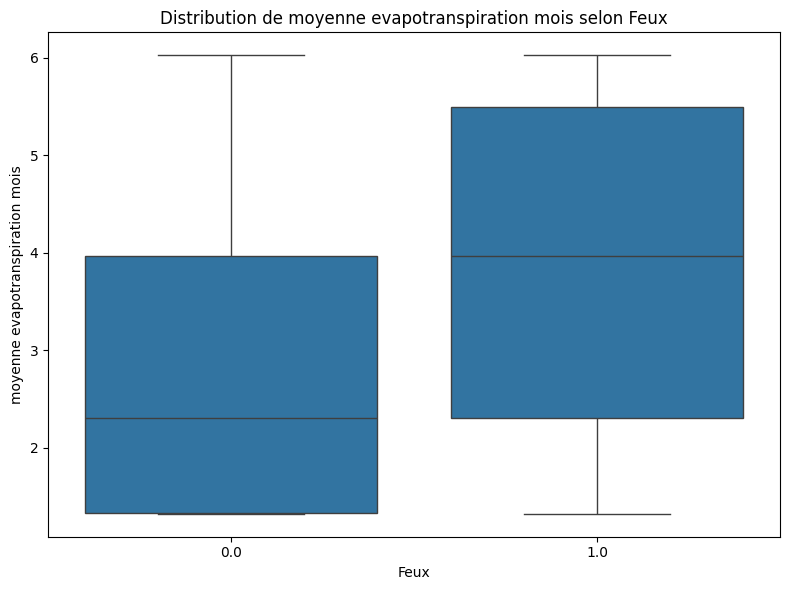

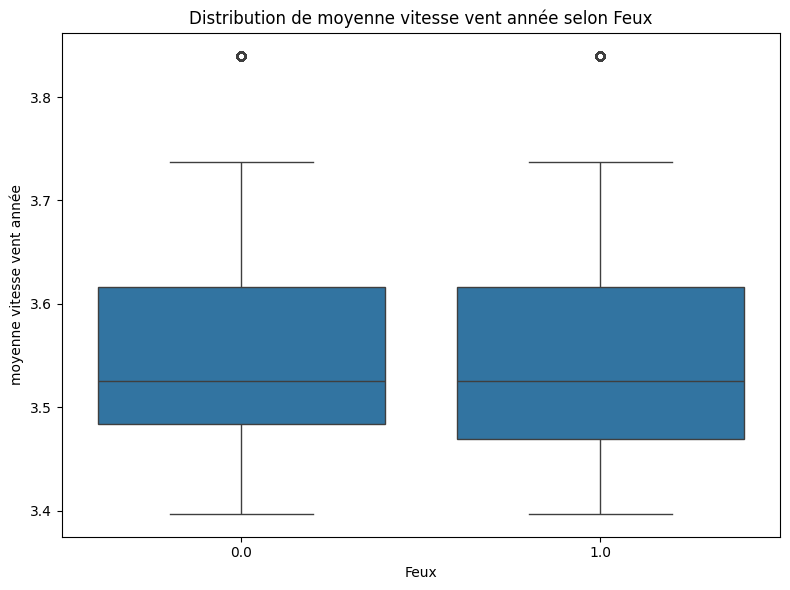

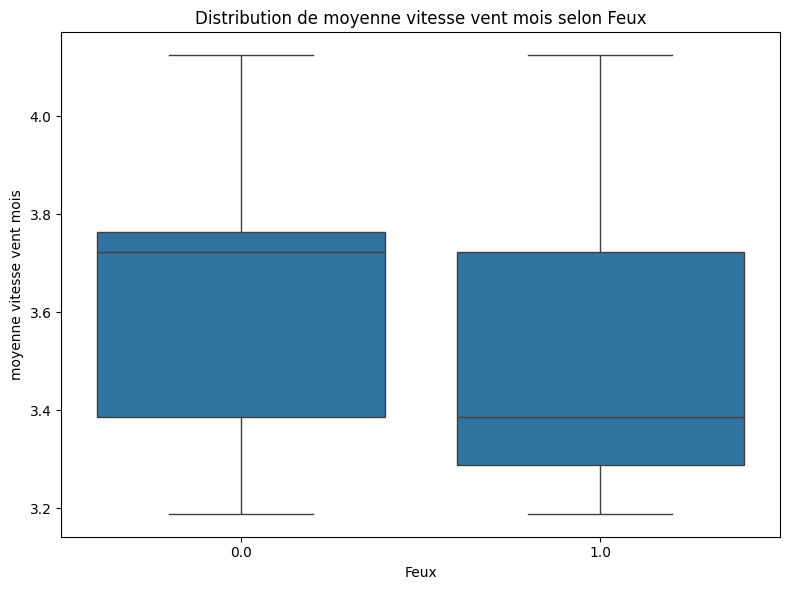

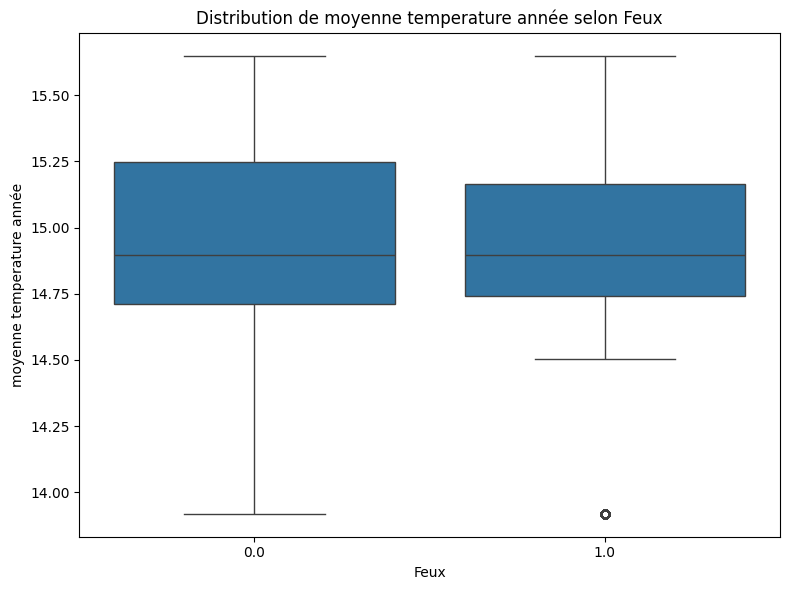

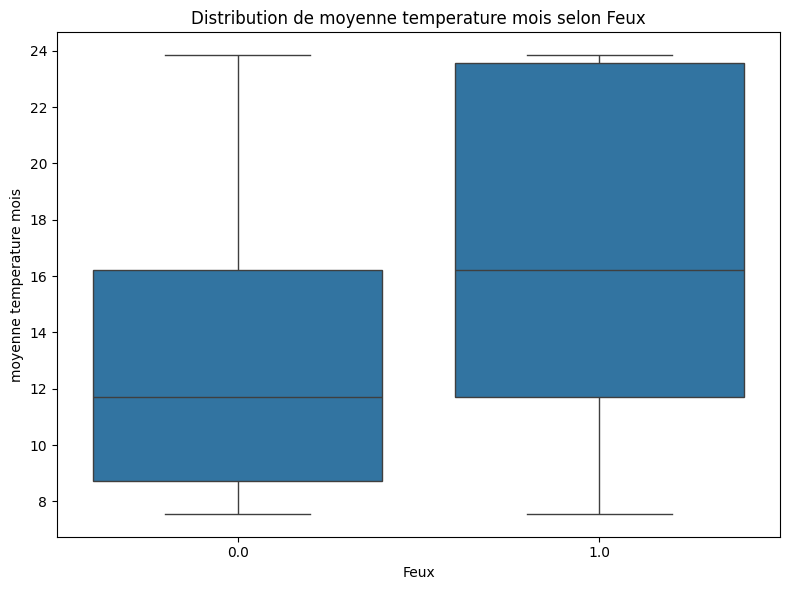

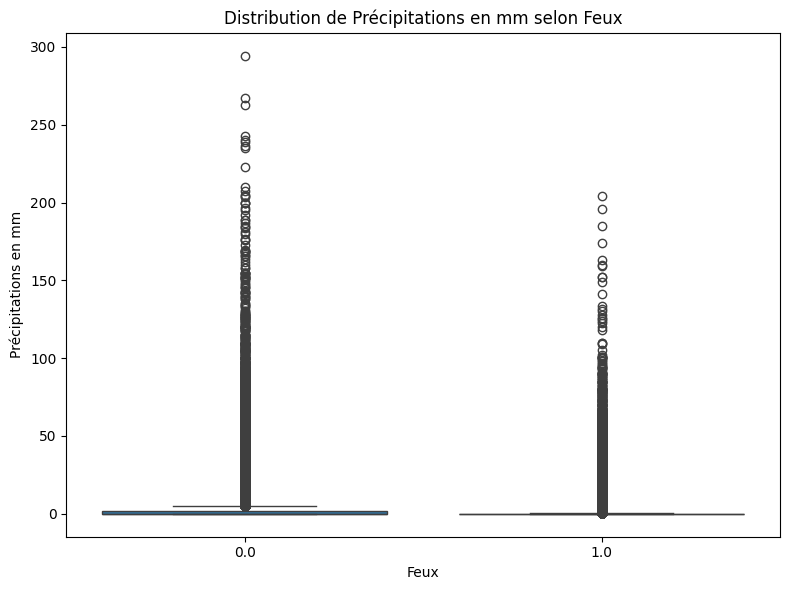

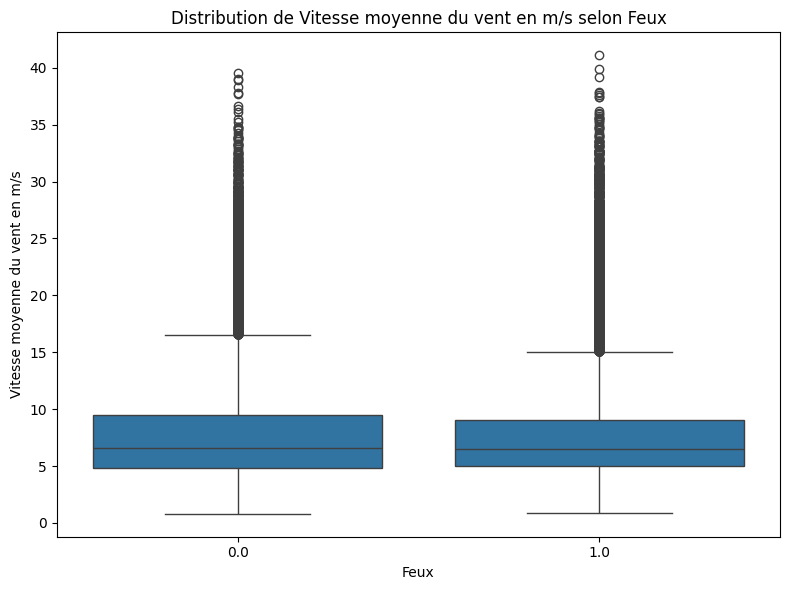

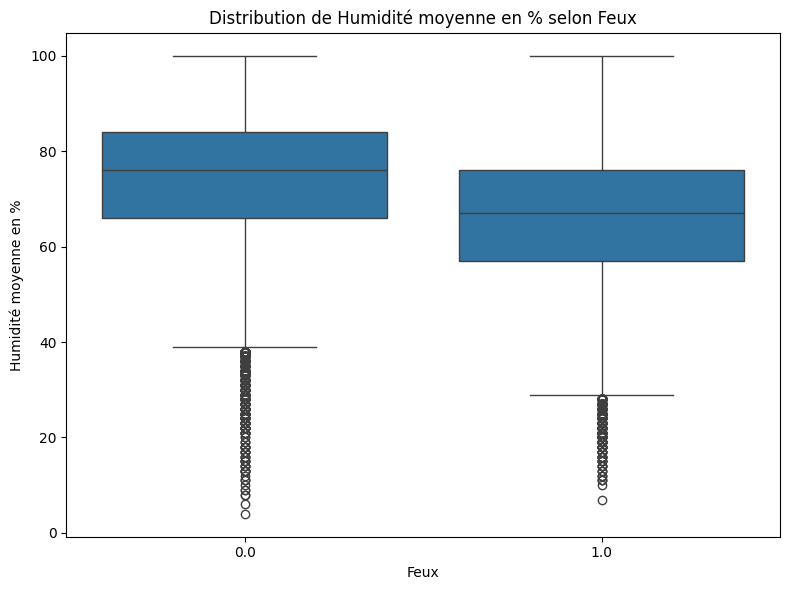

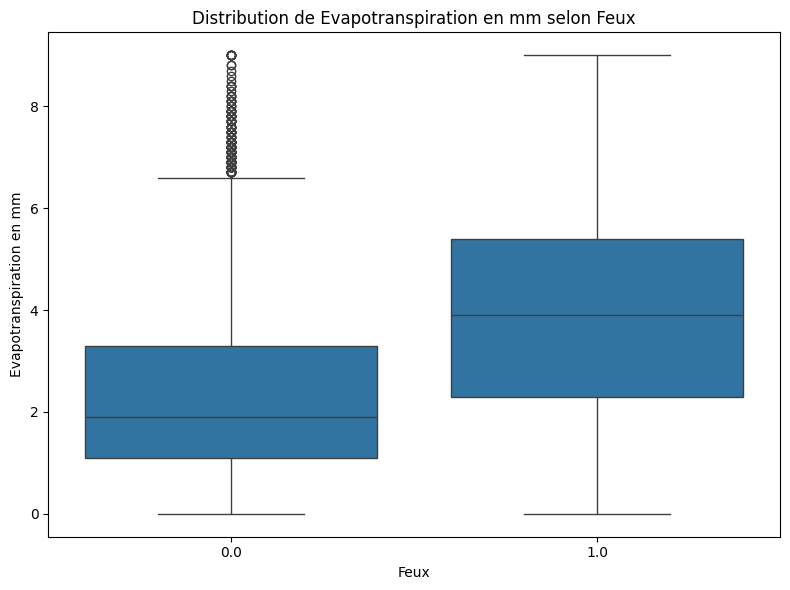

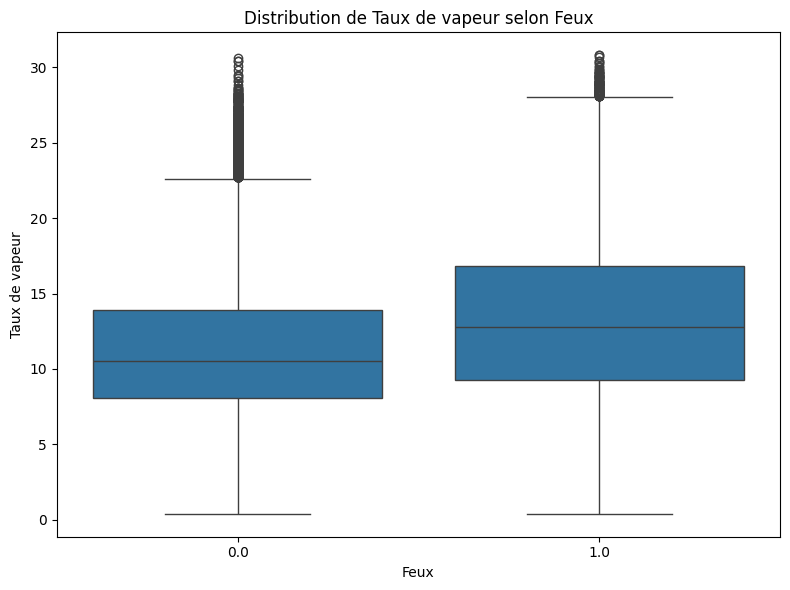

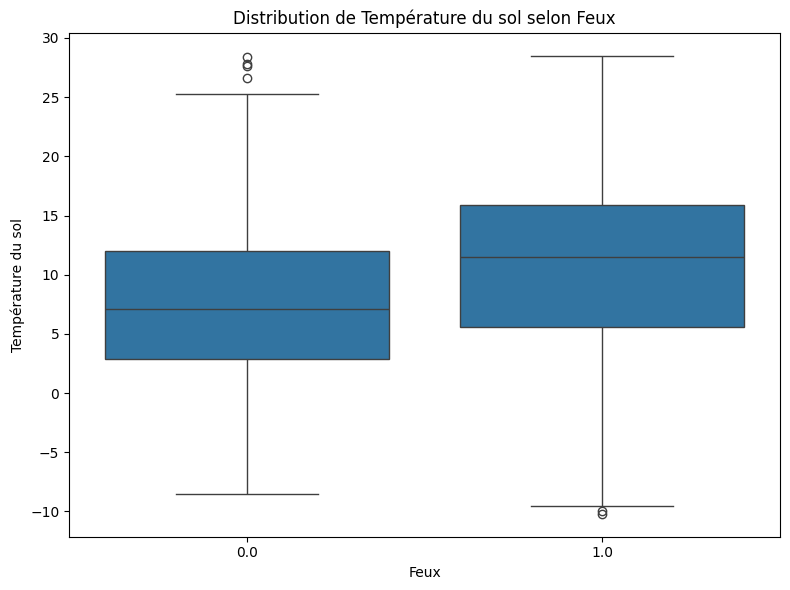

In [13]:
pio.renderers.default = 'notebook'
for feature in features:
    if feature != 'Feux':
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=df_selected, x='Feux', y=feature)
        plt.title(f"Distribution de {feature} selon Feux")
        plt.tight_layout()
        plt.show()

In [14]:
sksurv.datasets.load_breast_cancer

<function sksurv.datasets.base.load_breast_cancer()>

In [15]:
X, y = load_breast_cancer()

df_X = pd.DataFrame(X)

display(df_X.head())

,X200726_at,X200965_s_at,X201068_s_at,X201091_s_at,X201288_at,X201368_at,X201663_s_at,X201664_at,X202239_at,X202240_at,X202418_at,X202687_s_at,X203306_s_at,X203391_at,X204014_at,X204015_s_at,X204073_s_at,X204218_at,X204540_at,X204631_at,X204740_at,X204768_s_at,X204888_s_at,X205034_at,X205848_at,X206295_at,X207118_s_at,X208180_s_at,X208683_at,X209500_x_at,X209524_at,X209835_x_at,X209862_s_at,X210028_s_at,X210314_x_at,X210593_at,X211040_x_at,X211382_s_at,X211762_s_at,X211779_x_at,X212014_x_at,X212567_s_at,X214806_at,X214915_at,X214919_s_at,X215510_at,X215633_x_at,X216010_x_at,X216103_at,X216693_x_at,X217019_at,X217102_at,X217404_s_at,X217471_at,X217767_at,X217771_at,X217815_at,X218430_s_at,X218478_s_at,X218533_s_at,X218782_s_at,X218883_s_at,X218914_at,X219340_s_at,X219510_at,X219588_s_at,X219724_s_at,X220886_at,X221028_s_at,X221241_s_at,X221344_at,X221634_at,X221816_s_at,X221882_s_at,X221916_at,X221928_at,age,er,grade,size
0,10.926361,8.962608,11.630078,10.964107,11.518305,12.038527,9.623518,9.814798,10.016732,7.847383,11.053083,9.750477,9.640372,10.736998,2.617891,6.244280,6.168207,8.319661,9.905932,6.560598,7.601908,9.154889,6.650902,8.060232,3.919304,5.326001,3.279891,10.792969,13.359993,10.953240,8.210563,10.853697,8.180319,8.727915,10.523859,4.528973,9.871713,8.514466,11.053475,9.987269,10.617935,8.425574,7.297196,6.892774,7.766242,3.613518,7.384925,7.158914,3.944944,8.421447,7.751753,7.139760,5.245020,7.109084,9.724300,9.938705,10.659959,5.990597,9.994456,8.774758,9.012149,11.098567,8.416346,7.014110,7.402889,7.810886,5.345866,7.164900,7.129340,5.649573,6.313081,7.842097,10.132635,10.926365,6.477749,5.991885,57.0,negative,poorly differentiated,3.0
1,12.242090,9.531718,12.626106,11.594716,12.317659,10.776911,10.604577,10.704329,10.161838,8.744875,10.596457,9.826114,10.212158,10.634080,5.601266,6.542130,5.933586,9.118091,9.343768,6.041688,8.195171,9.589405,6.051768,9.964649,1.769561,8.290123,2.601028,8.451001,12.150872,10.835064,10.065289,9.931997,8.332043,9.132981,10.342614,4.190050,9.720058,7.694751,12.675152,9.178235,9.866305,7.401254,6.093107,6.004263,9.217588,5.703181,9.101168,5.628870,5.215237,9.760751,7.669779,5.305187,3.397536,5.702926,9.894494,6.374728,10.543280,6.289187,10.163964,9.284399,10.631153,10.424387,8.630697,7.326724,8.035647,8.957714,6.137391,5.948320,7.189642,7.599788,5.126765,8.780328,10.213467,9.555092,4.968050,7.051130,57.0,positive,poorly differentiated,3.0
2,11.661716,10.238680,12.572919,9.166088,11.698658,11.353333,9.384927,10.161654,10.032721,8.125487,10.834848,8.798453,9.353904,10.053435,7.337781,6.586000,5.571378,8.927673,6.924000,5.013382,8.416698,9.035384,4.022376,9.017518,1.555958,5.731169,3.913436,6.942269,13.250887,10.831861,10.239886,12.105761,9.023475,9.007883,10.144875,6.538038,11.124228,6.930861,11.451681,10.121054,11.974449,8.876391,8.780673,7.548751,8.137281,5.641967,8.560007,6.716974,5.191881,9.341145,7.134818,7.129177,10.424956,6.343200,12.846934,9.226757,10.264907,6.222330,8.873016,9.066065,8.779378,10.240787,8.566816,6.974651,4.379371,8.114802,5.305805,6.469413,7.222765,4.987613,6.936022,7.855649,10.164514,9.308048,4.283777,6.828986,48.0,negative,poorly differentiated,2.5
3,12.174021,9.819279,12.109888,9.086937,13.132617,11.859394,8.400839,8.670721,10.727427,8.650810,11.627066,9.066485,9.818331,10.538440,8.139874,8.477335,6.509024,9.292112,7.198628,6.674453,7.922825,9.327681,7.980359,8.455318,6.168658,8.538247,2.946791,7.563745,12.802444,11.067629,9.761374,11.284924,8.374399,8.539764,10.888251,7.230222,9.641587,8.407962,12.474523,10.012768,10.699418,8.441689,4.734516,6.234466,8.688415,3.330261,9.774374,4.861298,4.540211,9.484365,7.912452,6.970847,2.565533,6.857584,12.135507,8.169183,10.343002,6.945984,10.181249,9.312501,8.340574,9.458572,8.732912,7.703683,6.148008,8.102812,6.743547,7.326730,6.584748,7.205051,6.787297,6.678375,10.660092,10.208241,5.713404,6.927251,42.0,positive,poorly differentiated,1.8
4,11.484011,11.489233,11.779285,8.887616,10.429663,11.401139,7.741092,8.642018,

In [16]:
Xt = OneHotEncoder().fit_transform(X)
Xt.round(2).head()

,X200726_at,X200965_s_at,X201068_s_at,X201091_s_at,X201288_at,X201368_at,X201663_s_at,X201664_at,X202239_at,X202240_at,X202418_at,X202687_s_at,X203306_s_at,X203391_at,X204014_at,X204015_s_at,X204073_s_at,X204218_at,X204540_at,X204631_at,X204740_at,X204768_s_at,X204888_s_at,X205034_at,X205848_at,X206295_at,X207118_s_at,X208180_s_at,X208683_at,X209500_x_at,X209524_at,X209835_x_at,X209862_s_at,X210028_s_at,X210314_x_at,X210593_at,X211040_x_at,X211382_s_at,X211762_s_at,X211779_x_at,X212014_x_at,X212567_s_at,X214806_at,X214915_at,X214919_s_at,X215510_at,X215633_x_at,X216010_x_at,X216103_at,X216693_x_at,X217019_at,X217102_at,X217404_s_at,X217471_at,X217767_at,X217771_at,X217815_at,X218430_s_at,X218478_s_at,X218533_s_at,X218782_s_at,X218883_s_at,X218914_at,X219340_s_at,X219510_at,X219588_s_at,X219724_s_at,X220886_at,X221028_s_at,X221241_s_at,X221344_at,X221634_at,X221816_s_at,X221882_s_at,X221916_at,X221928_at,age,er=positive,grade=intermediate,grade=poorly differentiated,grade=unkown,size
0,10.93,8.96,11.63,10.96,11.52,12.04,9.62,9.81,10.02,7.85,11.05,9.75,9.64,10.74,2.62,6.24,6.17,8.32,9.91,6.56,7.60,9.15,6.65,8.06,3.92,5.33,3.28,10.79,13.36,10.95,8.21,10.85,8.18,8.73,10.52,4.53,9.87,8.51,11.05,9.99,10.62,8.43,7.30,6.89,7.77,3.61,7.38,7.16,3.94,8.42,7.75,7.14,5.25,7.11,9.72,9.94,10.66,5.99,9.99,8.77,9.01,11.10,8.42,7.01,7.40,7.81,5.35,7.16,7.13,5.65,6.31,7.84,10.13,10.93,6.48,5.99,57.0,0.0,0.0,1.0,0.0,3.0
1,12.24,9.53,12.63,11.59,12.32,10.78,10.60,10.70,10.16,8.74,10.60,9.83,10.21,10.63,5.60,6.54,5.93,9.12,9.34,6.04,8.20,9.59,6.05,9.96,1.77,8.29,2.60,8.45,12.15,10.84,10.07,9.93,8.33,9.13,10.34,4.19,9.72,7.69,12.68,9.18,9.87,7.40,6.09,6.00,9.22,5.70,9.10,5.63,5.22,9.76,7.67,5.31,3.40,5.70,9.89,6.37,10.54,6.29,10.16,9.28,10.63,10.42,8.63,7.33,8.04,8.96,6.14,5.95,7.19,7.60,5.13,8.78,10.21,9.56,4.97,7.05,57.0,1.0,0.0,1.0,0.0,3.0
2,11.66,10.24,12.57,9.17,11.70,11.35,9.38,10.16,10.03,8.13,10.83,8.80,9.35,10.05,7.34,6.59,5.57,8.93,6.92,5.01,8.42,9.04,4.02,9.02,1.56,5.73,3.91,6.94,13.25,10.83,10.24,12.11,9.02,9.01,10.14,6.54,11.12,6.93,11.45,10.12,11.97,8.88,8.78,7.55,8.14,5.64,8.56,6.72,5.19,9.34,7.13,7.13,10.42,6.34,12.85,9.23,10.26,6.22,8.87,9.07,8.78,10.24,8.57,6.97,4.38,8.11,5.31,6.47,7.22,4.99,6.94,7.86,10.16,9.31,4.28,6.83,48.0,0.0,0.0,1.0,0.0,2.5
3,12.17,9.82,12.11,9.09,13.13,11.86,8.40,8.67,10.73,8.65,11.63,9.07,9.82,10.54,8.14,8.48,6.51,9.29,7.20,6.67,7.92,9.33,7.98,8.46,6.17,8.54,2.95,7.56,12.80,11.07,9.76,11.28,8.37,8.54,10.89,7.23,9.64,8.41,12.47,10.01,10.70,8.44,4.73,6.23,8.69,3.33,9.77,4.86,4.54,9.48,7.91,6.97,2.57,6.86,12.14,8.17,10.34,6.95,10.18,9.31,8.34,9.46,8.73,7.70,6.15,8.10,6.74,7.33,6.58,7.21,6.79,6.68,10.66,10.21,5.71,6.93,42.0,1.0,0.0,1.0,0.0,1.8
4,11.48,11.49,11.78,8.89,10.43,11.40,7.74,8.64,9.56,8.48,11.50,9.90,9.72,10.83,3.13,7.40,7.58,9.17,13.00,6.04,8.86,9.20,7.65,6.54,6.36,5.98,3.28,9.37,12.48,10.10,10.91,9.68,7.60,7.83,9.70,6.42,10.68,9.08,11.18,10.73,10.03,8.90,4.46,7.96,9.29,6.38,8.08,2.37,5.28,10.91,7.54,7.36,3.43,6.42,9.97,7.50,10.27,5.30,9.73,10.27,7.37,8.99,9.05,6.58,7.00,8.23,6.92,6.56,8.05,6.97,7.31,7.36,11.57,10.93,5.82,6.66,46.0,1.0,1.0,0.0,0.0,3.0


In [17]:
alphas = 10.0 ** np.linspace(-4, 4, 50)
coefficients = {}

cph = CoxPHSurvivalAnalysis()
for alpha in alphas:
    cph.set_params(alpha=alpha)
    cph.fit(Xt, y)
    key = round(alpha, 5)
    coefficients[key] = cph.coef_

coefficients = pd.DataFrame.from_dict(coefficients).rename_axis(index="feature", columns="alpha").set_index(Xt.columns)

In [18]:
def plot_coefficients(coefs, n_highlight):
    _, ax = plt.subplots(figsize=(9, 6))
    alphas = coefs.columns
    for row in coefs.itertuples():
        ax.semilogx(alphas, row[1:], ".-", label=row.Index)

    alpha_min = alphas.min()
    top_coefs = coefs.loc[:, alpha_min].map(abs).sort_values().tail(n_highlight)
    for name in top_coefs.index:
        coef = coefs.loc[name, alpha_min]
        plt.text(alpha_min, coef, name + "   ", horizontalalignment="right", verticalalignment="center")

    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    ax.grid(True)
    ax.set_xlabel("alpha")
    ax.set_ylabel("coefficient")

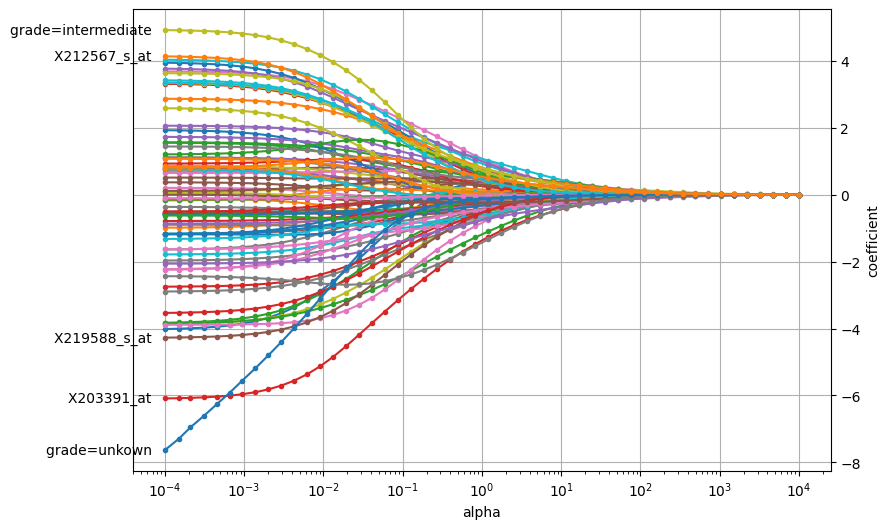

In [19]:
plot_coefficients(coefficients, n_highlight=5)

In [20]:
cox_lasso = CoxnetSurvivalAnalysis(l1_ratio=1.0, alpha_min_ratio=0.01)
cox_lasso.fit(Xt, y)

CoxnetSurvivalAnalysis(alpha_min_ratio=0.01, l1_ratio=1.0)

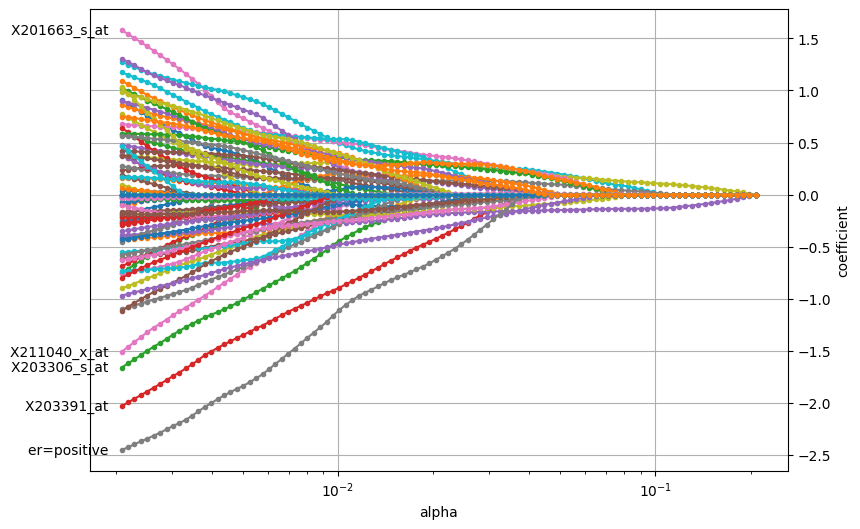

In [21]:
coefficients_lasso = pd.DataFrame(cox_lasso.coef_, index=Xt.columns, columns=np.round(cox_lasso.alphas_, 5))

plot_coefficients(coefficients_lasso, n_highlight=5)

In [22]:
cox_elastic_net = CoxnetSurvivalAnalysis(l1_ratio=0.9, alpha_min_ratio=0.01)
cox_elastic_net.fit(Xt, y)

CoxnetSurvivalAnalysis(alpha_min_ratio=0.01, l1_ratio=0.9)

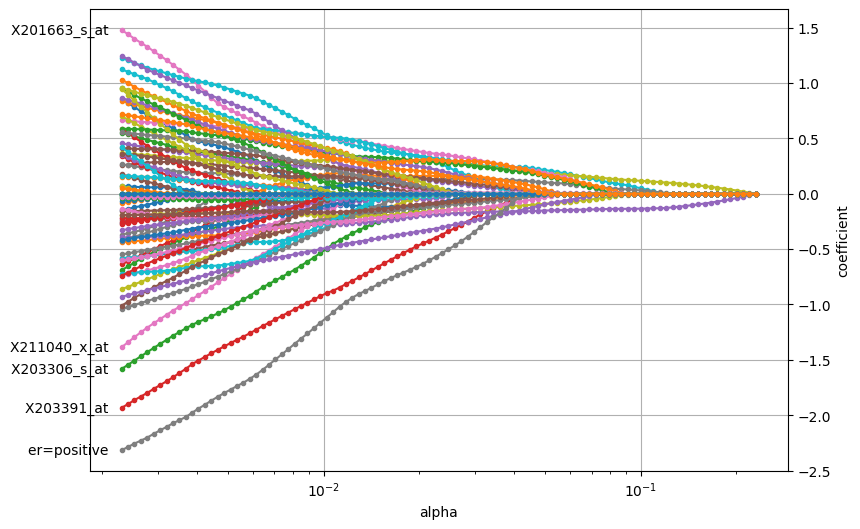

In [23]:
coefficients_elastic_net = pd.DataFrame(
    cox_elastic_net.coef_, index=Xt.columns, columns=np.round(cox_elastic_net.alphas_, 5)
)

plot_coefficients(coefficients_elastic_net, n_highlight=5)

In [24]:
print(y)

[( True,  723.) (False, 6591.) ( True,  524.) (False, 6255.)
 ( True, 3822.) (False, 6507.) (False, 5947.) (False, 5816.)
 (False, 6007.) ( True, 1233.) ( True, 1136.) (False, 5984.)
 (False, 6249.) ( True, 4066.) ( True,  690.) ( True,  994.)
 ( True,  434.) ( True, 1743.) ( True, 2863.) (False, 5693.)
 (False, 5823.) (False, 5785.) (False, 5661.) (False, 2909.)
 ( True, 1171.) (False, 5110.) (False, 5533.) (False, 5571.)
 (False, 5519.) (False, 5379.) (False, 4675.) (False, 4652.)
 (False, 4227.) ( True,  910.) (False, 4472.) ( True, 1206.)
 (False, 7057.) (False,  958.) (False, 5359.) (False, 5945.)
 (False, 5651.) ( True,  528.) ( True,  796.) (False, 5685.)
 ( True, 1023.) (False, 4791.) (False, 1215.) (False, 3779.)
 (False, 5306.) (False, 5678.) ( True,  421.) (False, 5612.)
 ( True, 3121.) (False, 1104.) (False, 4691.) (False, 5238.)
 (False, 5101.) (False, 2809.) (False, 3296.) (False, 3555.)
 (False, 5433.) (False, 5228.) (False, 5316.) (False, 4925.)
 (False, 5012.) (False, 